# **Classical ML**

Welcome to **Module L2: Classical ML**.

In L1, we built the *engine* (Linear Algebra). In L2, we teach the engine how to *drive itself* (Learning).

We are shifting focus from "calculating outputs" to **optimizing weights**.

### **Concept 1:**
Imagine you are trying to predict house prices based on their size. Linear Regression simply tries to draw the "best-fitting straight line" through that data. Mathematically, it tries to find the optimal weights ($w$) and bias ($b$) so that the difference between your predicted value ($\hat{y} = wx + b$) and the actual value ($y$) is minimized.

### **The Intuition: Drawing the Best Line**

Imagine you have a piece of graph paper.
* **X-axis:** Number of hours studied.
* **Y-axis:** Exam score.

You plot 5 dots representing 5 students. The dots go generally up (more study = higher score), but they aren't in a perfect straight line.

**The Goal:**
We want to draw **one straight line** through those dots that allows us to predict the score for *any* number of hours studied.

**The Problem:**
You can draw infinite lines. Some are too steep, some are too flat, some are too high. How do you mathematically prove which line is the "best"?

### **The "Why": Measuring the Mistake**

To find the best line, we need a way to score how "bad" a line is. We call this the **Cost Function** or **Loss Function**.

1.  **Calculate the Error:** We look at a specific dot. We measure the vertical distance between the **actual dot** (Real Score) and the **line** (Predicted Score). That distance is the "Error."
2.  **Square It:** Why square it?
    * *Reason 1:* Sometimes the dot is below the line (negative error). If we just added up the errors, $-5$ and $+5$ would cancel out to $0$, making us think the line is perfect when it's not. Squaring makes everything positive.
    * *Reason 2:* It punishes big mistakes. Being off by 10 points ($10^2 = 100$) is much worse than being off by 1 point ($1^2 = 1$).
3.  **Take the Average:** We add up all those squared errors and divide by the number of students.

This gives us the **Mean (Average) Squared Error (MSE)**.

**The "best fit line" is simply the line that results in the lowest possible MSE.**


**The Micro-Task:**
Before we use Scikit-Learn, I want you to understand the cost function.
1.  Create two NumPy arrays: `y_true` (actual values) and `y_pred` (predicted values).
2.  Write a Python function `calculate_mse(y_true, y_pred)` from scratch (using NumPy, no sklearn yet) that calculates the **Mean Squared Error (MSE)**.

*Equation hint: $MSE = \frac{1}{n} \sum (y_{true} - y_{pred})^2$*


In [ ]:
import numpy as np
import time
## Create some random y_true and y_pred
y_true = np.array([55, 74, 49, 82, 94])
y_pred = np.array([50, 60, 70, 80, 90])

start_time1 = time.time()
mse1 = 0
n = len(y_true)
for y in range(n):
    mse1 += ((y_true[y]-y_pred[y])**2)/n

end_time1 = time.time()
total_time1 = end_time1 - start_time1
start_time2 = time.time()
mse2 = np.mean((y_true - y_pred)**2)
end_time2 = time.time()
total_time2 = end_time2 - start_time2
print(f"Traditional Loop MSE = {mse1} took {total_time1} sec\nNP Mean MSE = {mse2} took {total_time2} sec")

**Perfect.** You have just built the engine that measures "how wrong" a model is.

Now, we need the engine that **fixes** the mistake.

---

### **Concept 2: Gradient Descent**

**The "Why":**
We calculated the MSE (the error). Our goal is to make that MSE as close to 0 as possible. We do this by changing the weights (the slope of our line).

**The Intuition (The Mountain Analogy):**
Imagine you are standing on top of a mountain blindfolded.
* **Height:** The Error (MSE). You want to get to the bottom (Zero Error).
* **Position:** Your current Weights.
* **Strategy:** You feel the ground with your foot. If it slopes down to the right, you take a step right. If it slopes down to the left, you take a step left.

**The Math:**
We calculate the **Gradient** (the slope of the mountain at your feet). Then we take a step in the *opposite* direction of the slope to go downhill.

The formula to update our weight ($w$) is:

$$w_{new} = w_{old} - (\text{learning\_rate} \times \text{gradient})$$

* **Learning Rate:** How big of a step you take. (Too big = you jump over the valley; Too small = it takes forever).


#### **The Radio Analogy**

Imagine you are driving an old car with a radio that has a manual tuning knob.

1.  **The Goal:** You want to find the perfect station with clear music (MSE = 0 / No Static).
2.  **The Current Situation:** You are currently at frequency 100.5 FM (`weight = 10`), but it's just static noise.
3.  **The "Gradient":** This is a hint that tells you which way to turn.
    * If the "Gradient" is **Positive (+)**, it means "The static gets **LOUDER** if you go up/higher."
    * If the "Gradient" is **Negative (-)**, it means "The static gets **LOUDER** if you go down/lower."

#### **The Strategy**

If the Gradient says "Going UP makes it WORSE" (Positive Slope), what should you do?
**You should go DOWN.**

You do the **opposite** of the gradient.

#### **The Formula in Plain English**

We calculate our **New Position** like this:

> **New Position** = **Current Position** MINUS (**Step Size** $\times$ **Slope Direction**)

* **Current Position (`weight`):** Where we are now (e.g., 10).
* **Slope Direction (`gradient`):** +2 (It says "Up is bad!").
* **Step Size (`learning_rate`):** 0.1 (We turn the knob gently, we don't yank it).

**The Calculation:**
* We are at 10.
* The slope is +2 (Up is bad).
* So we need to go **down**.
* We take a step of size `0.1 * 2` = `0.2`.
* **New Position:** `10 - 0.2 = 9.8`

---

**Micro-Task: The Single Step**

I want you to write a function that performs **one single step** of Gradient Descent.

**Task:**
1.  Define a function `update_weight(weight, gradient, learning_rate)`.
2.  It should return the new weight using the formula above.
3.  Test it with:
    * `weight = 10`
    * `gradient = 2` (Slope is positive, so we should go down/left)
    * `learning_rate = 0.1`

**Write the code and tell me the new weight.**

In [ ]:
def update_weight(weight, gradient, learning_rate):
    return weight - (gradient*learning_rate)

update_weight(10, 2, 0.1)

Now we have almost all the pieces:
1.  **Data:** `x` and `y_true`
2.  **Error Calculator:** `mse()`
3.  **Corrector:** `update_weight()`

The only thing missing is: **How did we know the Gradient was "2"?**

---

#### **Calculating the Real Gradient**

**The "Why":**
We can't just guess the slope (gradient). We have to calculate it based on our current data.

**The Logic:**
The gradient tells us how much the **Error** changes if we wiggle the **Weight**.
The calculus boils down to a surprisingly simple pattern:
$$Gradient = \text{Average of } (2 \times \text{Error} \times \text{Input})$$

* **Error:** `(y_pred - y_true)` (How far off were we?)
* **Input:** `x` (How big was the house?)
* **2:** Just a byproduct of the math (squaring the error).

**The Intuition:**
* If the **Error** is big, the gradient is big (needs a big correction).
* If the **Input** (`x`) is big, a small change in weight makes a HUGE difference in prediction, so the gradient is also big.

In Linear Regression, the "Model" is just a simple equation for a line.
$$Prediction = (Weight \times Input) + Bias$$$$y = mx + c$$
In Python/NumPy terms:y_pred = w * x

---

**Micro-Task: Calculate the Gradient**

I want you to write a function that calculates the gradient for a simple `y = w * x` model.

**Instructions:**
1.  Create a feature array `x = np.array([1, 2, 3])`.
2.  Create `y_true = np.array([2, 4, 6])` (Notice the relationship is clearly `y = 2x`).
3.  Assume our current weight is `w = 0.5` (A very bad guess!).
4.  Calculate `y_pred` using `w * x`.
5.  Implement the gradient formula using NumPy:
    `gradient = np.mean(2 * (y_pred - y_true) * x)`

**Write the code to calculate the gradient and print the result.**

In [ ]:
x = np.array([1, 2, 3])
y_true = np.array([2, 4, 6])
w = 0.5

y_pred = x *w
gradient = np.mean(2*(y_pred - y_true)*x)
gradient

The gradient is `-14.0`.

**What does this tell us?**
* **Magnitude (14):** This is a huge number. It means we are very far away from the correct answer. The error is loud.
* **Direction (Negative):** Remember the math?
    * `New_Weight = Current_Weight - (Gradient * Learning_Rate)`
    * `New_Weight = 0.5 - (-14.0 * 0.1)`
    * `New_Weight = 0.5 + 1.4 = 1.9`
* **Result:** The math automatically told us to **increase** our weight from 0.5 to 1.9. That is incredibly close to the true answer (which we know is 2.0)!

---

 **The Training Loop**

We just did **one** step of learning. Machine Learning is simply doing that thousands of times until the weight stops changing.

**Your Task:**
Put everything together into a loop to train your model.

**Instructions:**
1.  Initialize `w = 0.5`.
2.  Set `learning_rate = 0.01`.
3.  Write a `for` loop that runs **100 times** (epochs).
4.  Inside the loop:
    * Calculate `y_pred`.
    * Calculate `gradient`.
    * Update `w` using the formula.
5.  After the loop ends, print the final `w`.

*Goal: The final `w` should be very close to 2.0.*

**Write the full training script.**

In [ ]:
w = 0.5
learning_rate = 0.01

x = np.array([2, 4, 7, 9])
y_true = np.array([4, 8, 14, 18]) ## Take any y = mx example. We know the slope is 2, therefore the final wieght should also be 2

for _ in range(100):
    y_pred = x * w
    gradient = np.mean(2 * (y_pred - y_true) * x)
    w = update_weight(w, gradient, learning_rate)
w

### **Concept 3: Overfitting vs. Underfitting**

**The "Why":**
Every machine learning model has a "complexity knob."

  * If you turn it too low, the model is too stupid to learn the pattern (**Underfitting**).
  * If you turn it too high, the model hallucinates patterns that aren't there (**Overfitting**).

**The Intuition:**
Imagine you are trying to connect dots on a graph that form a gentle "U" shape.

  * **Underfitting (Degree 1):** You try to draw a straight line through a "U". It physically cannot capture the curve. It misses almost every dot.
  * **Overfitting (Degree 15):** You draw a frantic, scribbly line that hits every single dot perfectly, but to do so, it loops and wiggles wildly between points. It captures the **noise**, not the shape.


#### **Task:**

We are going to simulate a dataset that looks like a "U" shape (a curve) but is messy.

**1. Generate the Input (X):**
Create a sequence of 20 numbers ranging from -3 to 3.
* *Why:* This gives us the horizontal axis of our graph.

**2. Generate the Signal (Clean Y):**
Calculate the square of those numbers ($x^2$).
* *Why:* This creates a perfect parabola. This is the "Truth" we want the model to discover.

**3. Add the Noise (Noisy Y):**
Generate 20 random numbers (e.g., from a normal distribution) and add them to your Signal.
* *Why:* This messes up the perfect curve. Now the dots won't line up perfectly. This is the "messy reality" the model sees.

**Your Turn:**
Write the Python code using NumPy to generate these `x` and `y` arrays. Print the first few values to verify they aren't perfect squares.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 20)
y_clean = x ** 2
noise = np.random.normal(0, 1, 20)
y_noise = y_clean + noise

print("X:", x[:5])
print("Y_Clean:", y_clean[:5])
print("Y_Noise:", y_noise[:5])

X: [-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211]
Y_Clean: [9.         7.20498615 5.60941828 4.2132964  3.0166205 ]
Y_Noise: [9.13507017 8.29469487 5.45418661 3.16794189 3.15421001]



### **Concept 3.1: Underfitting (High Bias)**

**The "Why":**
Underfitting happens when your model is too simple to capture the complexity of the data.

  * **Our Data:** A Curve (Degree 2 Polynomial).
  * **The Model:** A Straight Line (Degree 1 Linear Regression).

It doesn't matter how much you train it. A straight line can *never* hug a curve. It will essentially just draw a line through the middle and get everything wrong.


##### **The Goal**
We want to prove that a **Simple Model** (a straight line) fails to capture a **Complex Reality** (a curve).

To do this, we need a way to say to the computer: *"I don't care that the data looks curved. I want you to force a straight line through it. Give me the best straight line you can find."*

##### **The Tool: `np.polyfit`**
NumPy has a function specifically for this experiment.

`np.polyfit(x, y, degree)`

* **x, y:** Your data points.
* **degree:** This is the "Complexity Knob."
    * **Degree 1:** "Find me a line ($y=mx+c$)." (Simple)
    * **Degree 2:** "Find me a curve ($y=ax^2 + bx + c$)." (Medium)
    * **Degree 15:** "Find me a crazy wiggle." (Complex)

When you run `np.polyfit(x, y, 1)`, it calculates the math and returns the numbers (coefficients) for that line.

##### **The Helper: `np.poly1d`**
`polyfit` gives you raw numbers (like `0.5` and `2.1`).
`np.poly1d` turns those raw numbers into a **Python function** that behaves like a math equation.

* If `polyfit` gave us the numbers for $2x + 1$...
* `p = np.poly1d(...)` creates a function `p`.
* If you type `p(3)`, it calculates $2(3) + 1 = 7$.

---

##### **Task: The "Stupid" Model**

We are going to force a Degree 1 (Straight Line) model onto your curved data.

**Step-by-Step Instructions:**

1.  **Train the Model:** Use `np.polyfit` with your `x` and `y_noise` data. Set the degree to `1`. Assign the result to a variable (e.g., `nos_line`).
2.  **Create the Predictor:** Pass those `nos_line` into `np.poly1d`. Assign this to a variable (e.g., `model_out`). This `model_out` is now a function!
3.  **Generate Predictions:** You can now pass your `x` array directly into `model_out(x)` to get the line's values.
4.  **Visualize:** Plot your original scatter plot again, but this time add a **new plot line** using `x` and your new predictions. Label it "Underfit (Deg 1)".

**Write the code to fit the line and plot the result.**

In [90]:
nos_line = np.polyfit(x, y_noise, 1)
model_out = np.poly1d(nos_line)
new_y = model_out(x)
new_y

array([3.33454677, 3.30302047, 3.27149417, 3.23996787, 3.20844157,
       3.17691527, 3.14538897, 3.11386267, 3.08233637, 3.05081007,
       3.01928377, 2.98775747, 2.95623117, 2.92470487, 2.89317857,
       2.86165227, 2.83012597, 2.79859967, 2.76707338, 2.73554708])

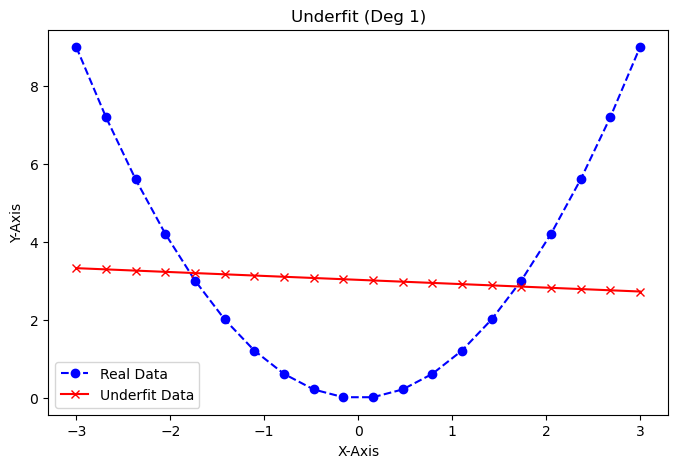

In [104]:
plt.figure(figsize = (8, 5))
plt.plot(x, y_clean, marker = "o", color = "Blue", label = "Real Data", linestyle = "--")
plt.plot(x, new_y, marker = "x", color = "Red", label = "Underfit Data")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.title("Underfit (Deg 1)")
plt.show()

This image is the definition of **Underfitting (High Bias)**.
* **The Reality (Blue):** A clear curve.
* **The Model (Red):** A stubborn straight line that fails to capture the curve. It "biases" the solution toward simplicity, ignoring the complexity of the data.

---

### **Concept 3.2: Overfitting (High Variance)**

Now let's swing the pendulum to the other extreme.

**The "Why":**
What if we give the model *too much* freedom? Instead of a straight line (Degree 1), let's give it a polynomial of **Degree 15**.

This means the equation looks like:
$$y = ax^{15} + bx^{14} + ... + z$$

This equation is so flexible it can wiggle and twist to hit almost every single noisy red dot perfectly. But in doing so, it will create a chaotic shape that looks nothing like the smooth blue parabola.

**Micro-Task: The "Hallucinating" Model**

**Instructions:**
1.  **Train the Model:** Use `np.polyfit` again with `x` and `y_noise`.
    * Change the degree to **15**.
    * Assign it to `coeffs_deg15`.
2.  **Create the Predictor:** Create `model_deg15` using `np.poly1d`.
3.  **Smooth Visualization (Crucial Step):**
    * If we just plot `model_deg15(x)`, the lines between points might look jagged.
    * Create a new variable `x_smooth = np.linspace(-3, 3, 100)` (this gives us 100 tiny steps instead of just 20).
    * Use this `x_smooth` to predict the line: `y_overfit = model_deg15(x_smooth)`.
4.  **Visualize:**
    * Scatter plot the original noisy data (`x`, `y_noise`).
    * Plot the clean truth (`x`, `y_clean`) as a dashed line.
    * Plot the new `y_overfit` model (`x_smooth`, `y_overfit`) in **Green**. Label it "Overfit (Deg 15)".

**Write the code and check the plot. Does the green line look like a parabola, or does it look crazy?**

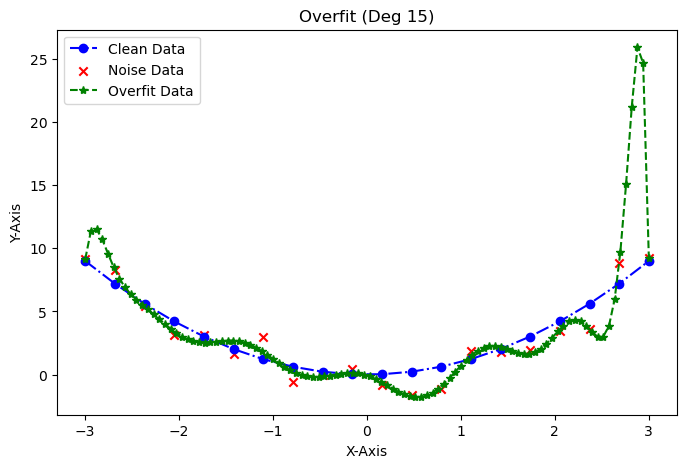

In [134]:
coeffs_deg15 = np.polyfit(x, y_noise, 15)
model_deg15 = np.poly1d(coeffs_deg15)

x_smooth = np.linspace(-3, 3, 100)
y_overfit = model_deg15(x_smooth)

plt.figure(figsize = (8, 5))
plt.plot(x, y_clean, linestyle = "-.", label = "Clean Data", marker = "o", color = "Blue")
plt.scatter(x, y_noise, label = "Noise Data", marker = "x", color = "Red")
plt.plot(x_smooth, y_overfit, linestyle = "--", label = "Overfit Data", marker = "*", color = "Green")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Overfit (Deg 15)")
plt.legend()
plt.show()

You should see the green line ("Overfit") wiggling wildly to hit every single red "x", completely missing the smooth blue curve ("Truth").

* **The Problem:** The model learned the **Noise** (the random jitters), not the **Signal** (the curve).
* **The Consequence:** If you gave it a *new* data point (a new exam question), it would likely give a completely wrong answer because it's expecting the noise to be exactly the same. This is **High Variance**.

---

### **Concept 4: Bias-Variance Tradeoff**

#### **1. Bias (The Assumption Error):**
* **Definition:** Bias is the error introduced by approximating a real-world problem (which may be complex) by a much simpler model. The model is too simple. It ignores data. (Degree 1)
* **The Mindset:** "I have a strong opinion about how the world works, and I will ignore data that disagrees with me."
* **High Bias Symptoms (Underfitting):**
    * The model is too simple (e.g., a straight line).
    * It pays little attention to the training data.
    * **Result:** High error on Training Data AND High error on Test Data.

#### **2. Variance (The Sensitivity Error):**
* **Definition:** Variance is the error introduced by the model's sensitivity to small fluctuations in the training set. It memorizes data. (Degree 15)
* **The Mindset:** "I have no opinion of my own; I will memorize exactly what you tell me right now."
* **High Variance Symptoms (Overfitting):**
    * The model is highly complex (e.g., a high-degree polynomial).
    * It captures random noise as if it were a significant pattern.
    * **Result:** Extremely low error on Training Data (perfect score), but High error on Test Data (fails in the real world).

#### **3. The Tradeoff**
* **Low Complexity:** High Bias, Low Variance. (Safe but stupid).
* **High Complexity:** Low Bias, High Variance. (Smart but unstable).
* **Optimal Spot:** The middle ground where the **Total Error** (Bias + Variance) is minimized.

As you decrease Bias (make the model smarter), you tend to increase Variance (make it more sensitive).

**The Goal:** Find the sweet spot where total error is lowest.


### **Task: Coding the Tradeoff**
#### **Step 1: The Setup (Data Generation)**

**The Goal:**
To see the tradeoff, we need two datasets:
1.  **Training Data:** The data the model studies (and can memorize).
2.  **Test Data:** New data the model has never seen.

If the model memorizes the Training Data (Overfitting), it will fail on the Test Data.

**The "Why":**
We need both datasets to come from the *same* underlying rule ($y = x^2$) but have *different* random noise. This simulates the real world: the laws of physics don't change, but every experiment has slightly different errors.

**Your Task:**
Write the code to generate these two specific datasets.
1.  `x`: 20 points from -3 to 3.
2.  `y_clean`: The perfect parabola ($x^2$).
3.  `y_train`: Add random noise to `y_clean`.
4.  `y_test`: Add **different** random noise to `y_clean`. (This is the crucial part!).


In [168]:
x = np.linspace(-3, 3, 20)
y_clean = x ** 2
y_train = y_clean + np.random.normal(0, 1, 20)
y_test = y_clean + np.random.normal(0, 1, 20)

#### **Step 2: The Loop Structure**

**The "Why":**
We want to see how the model's performance changes as we increase its IQ (Degree).
We need to collect two scores for every degree:

1.  **Train Error:** How well does it memorize the data it saw?
2.  **Test Error:** How well does it generalize to data it *didn't* see?

**Your Task:**
Write a loop that goes from Degree 1 to 9.
Inside the loop, for now, just **fit the model** on the training data.

**Instructions:**

1.  Initialize two empty lists: `train_error` and `test_error`.
2.  Start a loop: `for deg in range(1, 10):`
3.  Inside the loop:
      * Fit the model (`np.polyfit`) using `x` and `y_train` with the current `deg`.
      * Convert it to a function (`np.poly1d`).
      * *Do not calculate error yet. Just print "Fitting Degree [deg]" to confirm the loop works.*


In [ ]:
train_error = []
test_error = []
for deg in range(1, 10):
    coeff = np.polyfit(x, y_train, deg)
    model = np.poly1d(coeff)

#### **Step 3: Calculating the Error**

**The "Why":**
We need to measure how wrong the model is. Since this is a Regression problem (predicting numbers), we use **Mean Squared Error (MSE)**, just like we did at the very start of this session.

**The Logic:**
1.  **Generate Predictions:** Ask the model "What do you think Y is?" based on `x`.
    * `y_pred = model(x)`
2.  **Calculate Training Error (Memory):** Compare the prediction to the data it studied (`y_train`).
    * If this is low, the model is "memorizing" well.
3.  **Calculate Test Error (Generalization):** Compare the prediction to the fresh data (`y_test`).
    * If this is low, the model actually "learned" the rule.

**Your Task:**
Complete the loop.
1.  Calculate `y_pred` using `model(x)`.
2.  Calculate **Training MSE**.
3.  Calculate **Test MSE**.
4.  Append these values to your `train_error` and `test_error` lists.

In [185]:
train_error = []
test_error = []

for deg in range(1, 10):
    coeff = np.polyfit(x, y_train, deg)
    model = np.poly1d(coeff)
    y_pred = model(x)
    mse_train = np.mean((y_pred - y_train) ** 2)
    mse_test = np.mean((y_pred - y_test) ** 2)
    train_error.append(mse_train)
    test_error.append(mse_test)

You have built the data. Now we need to visualize the "Tradeoff."

---

#### **Step 4: The Revelation (Plotting)**

**The "Why":**
We are about to see the most famous curve in Machine Learning.
* **Blue Line (Training Error):** This should keep going DOWN. As the model gets smarter (higher degree), it memorizes the training dots better and better.
* **Red Line (Test Error):** This is the critical one.
    * At first, it goes **DOWN** (getting smarter).
    * Then, it hits a bottom (the "Sweet Spot").
    * Then, it shoots **UP** (getting too smart for its own good).

**The Task:**
Plot these two lists on the same graph.

**Instructions:**
1.  Create a list for your x-axis: `degrees = range(1, 10)`.
2.  Plot `degrees` vs `train_error` (Label: "Training Error", Color: Blue).
3.  Plot `degrees` vs `test_error` (Label: "Test Error", Color: Red).
4.  Add a legend, labels ("Degree", "MSE"), and a title ("Bias-Variance Tradeoff").

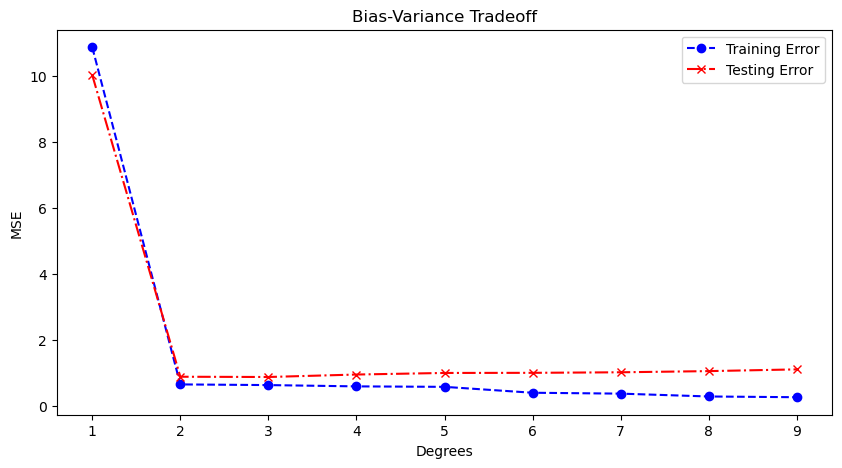

In [208]:
degrees = range(1, 10)
plt.figure(figsize = (10, 5))
plt.plot(degrees, train_error, color = "Blue", marker = "o", linestyle = "--", label = "Training Error")
plt.plot(degrees, test_error, color = "Red", marker = "x", linestyle = "-.", label = "Testing Error")
plt.xlabel("Degrees")
plt.ylabel("MSE")
plt.legend()
plt.title("Bias-Variance Tradeoff")
plt.show()

#### **Step 5: Code Review & Analysis**

1.  **Degree 1 (Underfitting/High Bias):**
    * Look at the far left. Both Blue (Train) and Red (Test) errors are **huge** (around 10-11).
    * **Interpretation:** The model is too stupid. It's a straight line trying to fit a curve. It fails on everything.

2.  **Degree 2 (The Sweet Spot):**
    * Look at x=2. Both errors drop dramatically to near 1.0.
    * **Interpretation:** This is perfect! The model found the underlying "parabola" rule ($y=x^2$).

3.  **Degree 3-9 (Overfitting starts):**
    * Look closely at the trend as you go right.
    * **Blue Line (Train):** It keeps going down (getting closer to 0). The model is memorizing the specific noise in the training set.
    * **Red Line (Test):** It starts to creep **up**.
    * **Interpretation:** The model is becoming a "memorizer." It's getting better at the training data but worse at the real world.

**Why is your red line not shooting up wildly?**

In this specific random run, your noise wasn't *crazy* enough to make degree 9 fail catastrophically, but you can see the gap widening. The Training error is near 0, while the Test error stays stuck or rises slightly. That **gap** is Overfitting.


### **The Sine Wave Challenge**

Instead of a simple parabola ($x^2$), we are going to use a **Sine Wave** ($y = \sin(x)$). This is a more complex curve that really highlights the difference between the models.

**Specifications:**

1.  **Data Generation:**
    * **X:** Create 20 points between $0$ and $2\pi$ (roughly 0 to 6.28).
    * **Y Truth:** Calculate `np.sin(x)`.
    * **Y Noisy:** Add random normal noise (scale=0.2) to `Y Truth`.
2.  **Modeling:**
    * Train **three** distinct models on the noisy data:
        * **Model A:** Degree 1 (Linear).
        * **Model B:** Degree 3 (Cubic).
        * **Model C:** Degree 20 (High Complexity).
3.  **Visualization:**
    * Create a single plot.
    * Show the **Noisy Data** as scatter dots.
    * Show the **True Sine Wave** (clean) as a dashed black line.
    * Show **Model A (Degree 1)** in Red.
    * Show **Model B (Degree 3)** in Blue.
    * Show **Model C (Degree 20)** in Green.
    * *Tip: Use a smooth x-axis (e.g., 100 points) for plotting the model lines so they look like curves, not jagged lines.*

**Your Goal:**
Write the full script. Generate the plot. Then, tell me based on the visual: **Which model has High Bias? Which has High Variance?**

C:\Users\teenu\AppData\Local\Temp\ipykernel_11600\1619239130.py:16: RankWarning: Polyfit may be poorly conditioned
  coeff20 = np.polyfit(x, y_noise, 20)


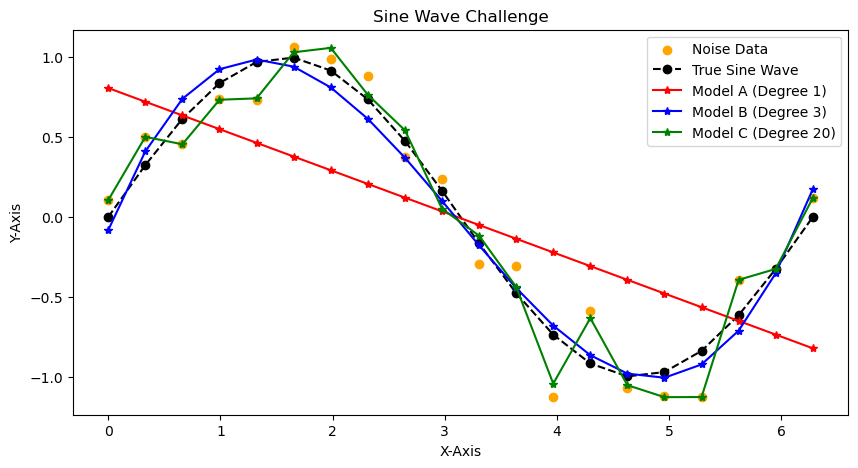

In [242]:
import pandas as pd
import numpy as np

## Data Generation
x = np.linspace(0, (2*np.pi), 20)
y_clean = np.sin(x)
y_noise = y_clean + np.random.normal(0, 0.2, 20)

## Modeling
coeff1 = np.polyfit(x, y_noise, 1)
model1 = np.poly1d(coeff1)
y_res1 = model1(x)
coeff3 = np.polyfit(x, y_noise, 3)
model3 = np.poly1d(coeff3)
y_res3 = model3(x)
coeff20 = np.polyfit(x, y_noise, 20)
model20 = np.poly1d(coeff20)
y_res20 = model20(x)

## Visualization
plt.figure(figsize = (10, 5))
plt.scatter(x, y_noise, marker = "o", color = "Orange", label = "Noise Data")
plt.plot(x, y_clean, marker = "o", color = "Black", linestyle = "--", label = "True Sine Wave")
plt.plot(x, y_res1, marker = "*", color = "Red", label = "Model A (Degree 1)")
plt.plot(x, y_res3, marker = "*", color = "Blue", label = "Model B (Degree 3)")
plt.plot(x, y_res20, marker = "*", color = "Green", label = "Model C (Degree 20)")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.title("Sine Wave Challenge")
plt.show()

**Analysis:**
* **Model A (Red):** "Undertrained" is correct. Technical term: **High Bias (Underfitting)**. It assumes the world is straight, ignoring the curve.
* **Model C (Green):** "Overtrained" is correct. Technical term: **High Variance (Overfitting)**. Look at how it wiggles violently between x=3 and x=4 to hit a random noise dot.
* **Model B (Blue):** The "Goldilocks" model. It captures the wave without chasing the noise.



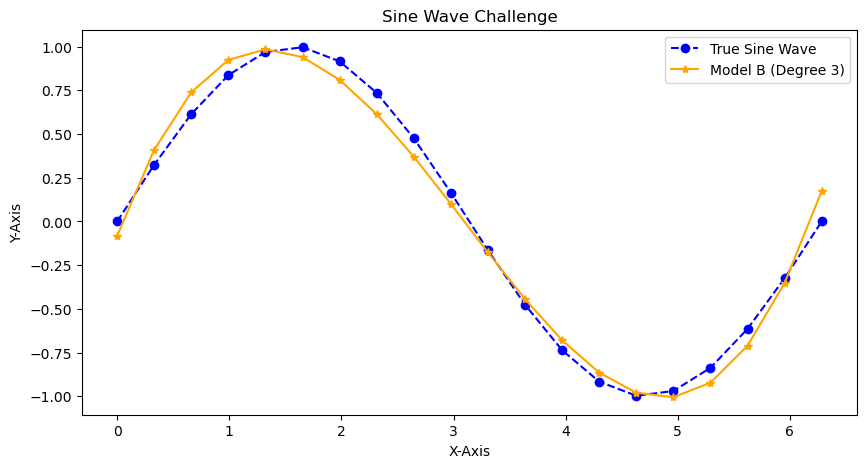

In [249]:
plt.figure(figsize = (10, 5))
plt.plot(x, y_clean, marker = "o", color = "Blue", linestyle = "--", label = "True Sine Wave")
plt.plot(x, y_res3, marker = "*", color = "Orange", label = "Model B (Degree 3)")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.legend()
plt.title("Sine Wave Challenge")
plt.show()

### **Topic 5: Evaluation Metrics (Precision, Recall, F1)**

Now that you understand *how* models fail (Bias/Variance), let's learn how to *grade* them when they make decisions (Classification).

We are shifting gears from **Regression** (predicting a number like 1.5) to **Classification** (predicting a class like Yes/No).

**The Scenario: The "Cancer Detector"**
Imagine you built an AI to detect a rare disease.
* You test it on 100 patients.
* 95 are Healthy.
* 5 are Sick.

Your AI predicts: **"Everyone is Healthy."**

1.  **Accuracy:** 95/100 = **95%**.
    * *Reaction:* "Wow! 95% accuracy! Let's deploy it!"
2.  **Reality:** You missed all 5 sick people. They died. Your AI is useless.

**Conclusion:** Accuracy is a liar when classes are imbalanced.

---

### **Task: The Confusion Matrix**

We need to manually calculate the better metrics.

**Data:**
* **TP (True Positive):** 1 (Sick person correctly found)
* **FP (False Positive):** 8 (Healthy person scared unnecessarily)
* **FN (False Negative):** 4 (Sick person missed - Critical!)
* **TN (True Negative):** 87 (Healthy person correctly cleared)

**Your Task:**
Write a Python script to calculate these 3 metrics from those 4 numbers.

1.  **Precision:** $\frac{TP}{TP + FP}$
    * *Meaning:* When it beeps, should I panic?
2.  **Recall:** $\frac{TP}{TP + FN}$
    * *Meaning:* Did we find everyone?
3.  **F1 Score:** $2 \times \frac{Precision \times Recall}{Precision + Recall}$
    * *Meaning:* The balance.


### **The Project (Titanic)**

Now that you understand the "mechanics" (finding the best line by minimizing error), we are graduating from toy numbers to real-world data.

We are going to use **Scikit-Learn** (the industry-standard library). It does all that math (gradient descent, loops, derivatives) for you in one line of code.

**Topic:** Classification (Predicting Categories: Yes/No, Cat/Dog, Survived/Died).

**Dataset:** The Titanic Dataset.

**Goal:** Predict who survives based on their data.

**Sub-Task 1: Load and Inspect**

1.  Load the dataset from this URL:
    `url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"`
2.  Display the first 5 rows.
3.  Check for missing values.

**Write the code to load the data and tell me which column has the most missing values.**

In [ ]:
import pandas as pd
## Download the dataset, adn store it within.
df = pd.read_csv(r"Data/Titanic.csv")
print(df.isnull().sum())